In [24]:
df = pd.read_csv("./archive/economy.csv")

<IPython.core.display.Javascript object>

In [25]:
df.shape

(206774, 11)

In [141]:
df.head()

,date,airline,from,time_taken,stop,to,price
0,11-02-2022,spicejet,delhi,2,0,Mumbai,5953
1,11-02-2022,spicejet,delhi,2,0,Mumbai,5953
2,11-02-2022,airasia,delhi,2,0,Mumbai,5956
3,11-02-2022,vistara,delhi,2,0,Mumbai,5955
4,11-02-2022,vistara,delhi,2,0,Mumbai,5955


In [160]:
df.tail()

,date,airline,from,time_taken,stop,to,price
206769,31-03-2022,vistara,chennai,13,1,Hyderabad,7697
206770,31-03-2022,vistara,chennai,13,1,Hyderabad,7709
206771,31-03-2022,vistara,chennai,20,1,Hyderabad,8640
206772,31-03-2022,vistara,chennai,23,1,Hyderabad,8640
206773,31-03-2022,vistara,chennai,24,1,Hyderabad,8640


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206772 entries, 0 to 206773
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206772 non-null  object
 1   airline     206772 non-null  object
 2   from        206772 non-null  object
 3   time_taken  206772 non-null  object
 4   stop        206772 non-null  object
 5   to          206772 non-null  object
 6   price       206772 non-null  object
dtypes: object(7)
memory usage: 20.7+ MB


In [71]:
df.duplicated().sum()

73

In [30]:
df.drop_duplicates(inplace=True)

In [74]:
df.drop(columns=["dep_time","arr_time"], axis=1, inplace=True)

In [38]:
def convertToLower(column):
    return df[column].map(lambda x: str(x).lower().replace(" ",""))

In [40]:
df.airline = convertToLower('airline')

In [42]:
df['from'] = convertToLower('from')

In [ ]:
df['to'] = convertToLower('to')

In [58]:
str(df['stop'][18]).split('\n')[0].split('-')[0]

'1'

In [68]:
def splitStops(data):
    data = str(data).split('\n')
    if( len(data) > 1):
        data = data[0].split('-')[0]
    else:
        data = '0'
    return data.strip()

In [72]:
# df.stop = df.stop.map(lambda x : splitStops(x))

In [73]:
df.stop.unique()

array(['0', '1'], dtype=object)

In [86]:
df.time_taken[0].split(' ')[0]

'02h'

In [ ]:
p = re.compile('\d{2}')

In [101]:
def getTimeTaken(data):
    return p.findall(data)[0]

In [102]:
df.time_taken = df.time_taken.map(lambda x : getTimeTaken(x))

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time_taken', ylabel='Count'>

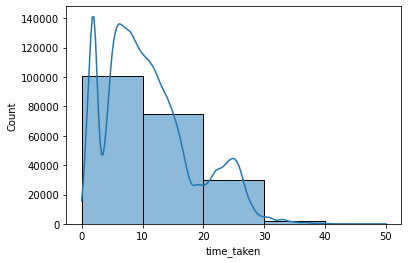

In [128]:
sns.histplot(df.time_taken, bins=5, kde=True)

In [110]:
fig = plt.figure(figsize =(10, 7))

<IPython.core.display.Javascript object>

<Figure size 720x504 with 0 Axes>

In [115]:
df.time_taken = df.time_taken.astype(int)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='airline', ylabel='time_taken'>

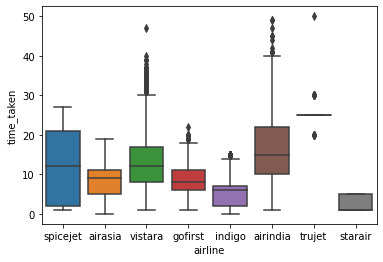

In [130]:
sns.boxplot(x = df.airline, y=df.time_taken)

In [126]:
df.time_taken.quantile([.25, .99])

0.25     6.0
0.99    29.0
Name: time_taken, dtype: float64

In [33]:
df.columns

Index(['date', 'airline', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time',
       'to', 'price'],
      dtype='object')

<IPython.core.display.Javascript object>

F:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

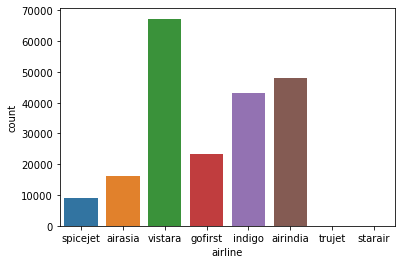

In [129]:
sns.countplot(df.airline)

In [131]:
df.airline.value_counts()

vistara     67270
airindia    47994
indigo      43120
gofirst     23177
airasia     16098
spicejet     9011
starair        61
trujet         41
Name: airline, dtype: int64

In [132]:
df.groupby("airline")['time_taken'].agg({"max","min","mean"})

,mean,max,min
airline,,,
airasia,8.477326,19,0
airindia,15.642580,49,1
gofirst,8.293739,22,1
indigo,5.349235,15,0
spicejet,12.120519,27,1
starair,2.377049,5,1
trujet,25.731707,50,20
vistara,13.014865,47,1


In [137]:
# df.groupby("airline")['price'].agg({"max","min","mean"})

In [140]:
df.price = df.price.map(lambda x : str(x).replace(',',''))

In [142]:
df.price = df.price.astype(int)

In [143]:
df.groupby("airline")['price'].agg({"max","min","mean"})

,mean,max,min
airline,,,
airasia,4091.072742,31917,1105
airindia,7313.682169,42349,1526
gofirst,5651.930578,32803,1105
indigo,5324.216303,31952,1105
spicejet,6179.278881,34158,1106
starair,4932.655738,17482,2000
trujet,3244.634146,4844,3124
vistara,7806.943645,37646,1714


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price', ylabel='Count'>

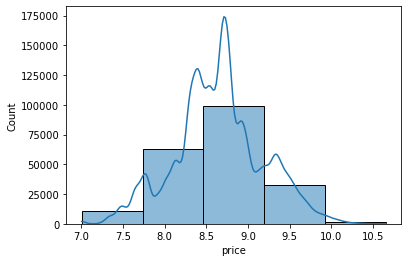

In [153]:
sns.histplot(np.log(df.price), bins=5, kde=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='airline', ylabel='price'>

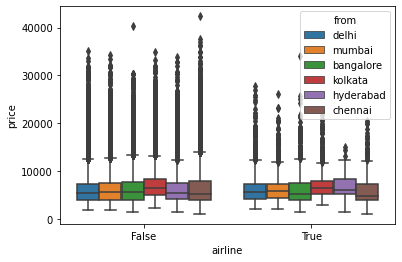

In [159]:
sns.boxplot(x=df.airline.isin(["spicejet"]), y=df.price, hue=df['from'])

<IPython.core.display.Javascript object>

F:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='time_taken', ylabel='Count'>

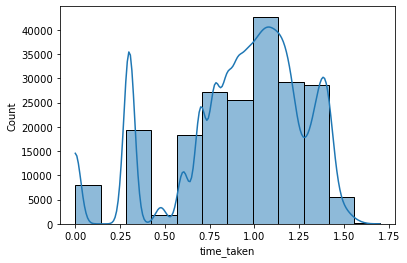

In [150]:
sns.histplot(np.log10(df.time_taken), bins=12, kde=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='price'>

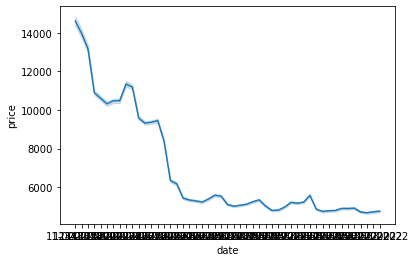

In [158]:
sns.lineplot(x=df.date, y= df.price)

<IPython.core.display.Javascript object>

F:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='price', ylabel='time_taken'>

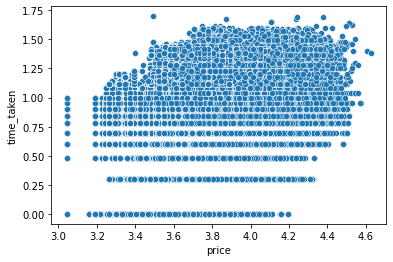

In [163]:
sns.scatterplot(x=np.log10(df.price), y=np.log10(df.time_taken))

In [165]:
df.head()

,date,airline,from,time_taken,stop,to,price
0,11-02-2022,spicejet,delhi,2,0,Mumbai,5953
1,11-02-2022,spicejet,delhi,2,0,Mumbai,5953
2,11-02-2022,airasia,delhi,2,0,Mumbai,5956
3,11-02-2022,vistara,delhi,2,0,Mumbai,5955
4,11-02-2022,vistara,delhi,2,0,Mumbai,5955


In [167]:
df_delhi = df[df['from']=='delhi']

In [186]:
df_delhi.head()

,date,airline,from,time_taken,stop,to,price
0,11-02-2022,spicejet,delhi,2,0,Mumbai,5953
1,11-02-2022,spicejet,delhi,2,0,Mumbai,5953
2,11-02-2022,airasia,delhi,2,0,Mumbai,5956
3,11-02-2022,vistara,delhi,2,0,Mumbai,5955
4,11-02-2022,vistara,delhi,2,0,Mumbai,5955


In [169]:
df_delhi.shape

(43027, 7)

In [170]:
df_delhi.to.value_counts()

Bangalore    10144
Mumbai        9982
Kolkata       8654
Chennai       7666
Hyderabad     6581
Name: to, dtype: int64

In [184]:
df_delhi.groupby(['to'])[['time_taken','price','stop']].agg({'max','min','mean'})

time_taken                price              stop        
                mean max min         mean    max   min mean max min
to                                                                 
Bangalore   9.474862  36   2  6175.622535  31917  3090  inf   1   0
Chennai    11.384294  37   2  6102.317245  35145  1998  inf   1   0
Hyderabad  11.681659  39   1  6031.164261  30760  2022  inf   1   0
Kolkata    11.605500  35   2  7045.621678  32999  2480  inf   1   0
Mumbai      9.146363  30   2  6059.826087  31260  2281  inf   1   0

In [178]:
data = df_delhi[df_delhi.to == 'Delhi']

In [179]:
data.shape

(0, 7)

In [185]:
df_delhi.describe()

,time_taken,price
count,43027.000000,43027.000000
mean,10.504916,6288.585423
std,7.155938,3627.729655
min,1.000000,1998.000000
25%,5.000000,4000.000000
50%,9.000000,5504.000000
75%,14.000000,7425.000000
max,39.000000,35145.000000
